# Clustering

In `supervised learning`, algorithms start with a set of labeled data and use that as the basis for making predictions about new, unlabeled data. **Clustering**, however, is an example of `unsupervised learning`, in which we work with completely unlabeled data (or in which our data has labels but we ignore them).

Whenever you look at some source of data, `it’s likely that the data will somehow form clusters`. There is generally no “correct” clustering and the `clusters won’t label themselves`. You’ll have to do that by looking at the data underlying each one.

## k-means
One of the simplest clustering methods is **k-means**, in which the number of clusters `k` is chosen in advance, after which the goal is to partition the inputs into sets `S1, ..., Sk` in a way that minimizes the total sum of squared distances from each point to the mean of its assigned cluster.

There are a lot of ways to assign `n` points to `k` clusters, which means that finding an optimal clustering is a very hard problem. We’ll settle for an iterative algorithm that usually finds a good clustering:

1. Start with a set of k-means, which are points in d-dimensional space.
2. Assign each point to the mean to which it is closest.
3. If no point’s assignment has changed, stop and keep the clusters.
4. If some point’s assignment has changed, recompute the means and return to step 2.

To start with, we will create a helper function that measures how many coordinates two vectors differ in. We will us this to track our training progress:

In [1]:
from scratch.linear_algebra import Vector

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

In [4]:
assert num_differences([1,2,3], [2,1,3]) == 2
assert num_differences([1,2], [1,2]) == 0

We also need a function, that given some vectors and their assignments to clusters, computes the means of the clusters.

In [71]:
from typing import List
from scratch.linear_algebra import vector_mean

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

def cluster_means(k: int,
                 inputs: List[Vector],
                 assignments: List[int]) -> List[Vector]:
    
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    
    print(f"cluster_means -> clusters = {clusters}")
    
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
        print(f"cluster_means -> clusters[{assignment}] = {clusters[assignment]}")
        
    # if a cluster is empty, just use a random point
    vm = [vector_mean(cluster) if cluster else random.choice(inputs)
           for cluster in clusters]
    print(f"cluster_means -> {vm}")
    return vm

In [112]:
import itertools
import random
import tqdm
from scratch.linear_algebra import squared_distance

class KMeans:
    
    def __init__(self, k: int) -> None:
        self.k = k # number of clusters
        self.means = None # mean of clusters
        
    def classify(self, input: Vector) -> int:
        """
        Return the index of the cluster closest to the input
        """
        
        print(f"\nclassify -> input = {input}")
        
        for i in range(self.k):
            print(f"classify -> self.k = {self.k}")
            print(f"classify -> i = {i}")
            print(f"classify -> self.means[{i}] = {self.means[i]}")
            sd = squared_distance(input, self.means[i])
            print(f"classify -> squared_distance(input, self.means[i]) = {sd}")
            
        m = min(range(self.k),
                  key=lambda i: squared_distance(input, self.means[i]))
            
        print(f"classify -> cluster id of min squared_distance from point to cluster mean = {m}")
        
        return min(range(self.k),
                  key=lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs: List[Vector]) -> None:
        
        # start with random assignmnets
        # assign each vector to one of the clusters
        assignments = [random.randrange(self.k) for _ in inputs]
        
        print(f"train -> inputs = {inputs}")
        print(f"train -> initial random assignmnets: {assignments}")
        
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                
                print(f"\n-----\ntrain -> iteration = {_}")
                
                # compute means and find new assignmnets
                self.means = cluster_means(self.k, inputs, assignments)
                print(f"train -> self.means = {self.means}")
                
                new_assignments = [self.classify(input) for input in inputs]
                print(f"train -> new_assignments = {new_assignments}")
                
                # check how many assignmnets changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                print(f"train -> num_changed = {num_changed}")      

                if num_changed == 0:
                    return
                
                # otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                
                print(f"train -> self.means = {self.means}")
                print(f"train -> assignments = {assignments}")
                
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

In [59]:
# Plot the data

import matplotlib.pyplot as plt
%matplotlib inline

def plot_user_locations(xs, ys):
    
    plt.figure(figsize=(10,8))

    plt.scatter(xs, ys)

    plt.title("User Locations")
    plt.xlabel("Blocks east of city center")
    plt.ylabel("Blocks north of city center")
    plt.savefig('images/clustering1.png')
    plt.show()

In [119]:
# Small number of points for learning how algorythm works
inputs: List[List[float]] = [[-14,-5],
                             [-13,-6],
                             [5,6], [7,8]]

In [120]:
xs = [x for x, y in inputs]
xs

[-14, -13, 5, 7]

In [121]:
ys = [y for x, y in inputs]
ys

[-5, -6, 6, 8]

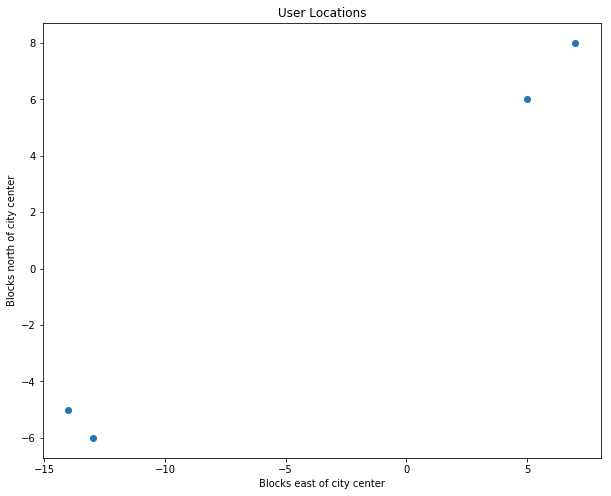

In [122]:
plot_user_locations(xs, ys)

Depending on how you look at it, you can see 2 or 3 clusters. It is easy to do visually because the data is only two-dimensional. With more dimensions, it would be a lot harder to eyeball.

In [123]:
random.seed(12) # to get the same results every time
clusterer = KMeans(k=2)
clusterer.train(inputs)

changed: 1 / 4: : 0it [00:00, ?it/s]

train -> inputs = [[-14, -5], [-13, -6], [5, 6], [7, 8]]
train -> initial random assignmnets: [1, 1, 1, 0]

-----
train -> iteration = 0
cluster_means -> clusters = [[], []]
cluster_means -> clusters[1] = [[-14, -5]]
cluster_means -> clusters[1] = [[-14, -5], [-13, -6]]
cluster_means -> clusters[1] = [[-14, -5], [-13, -6], [5, 6]]
cluster_means -> clusters[0] = [[7, 8]]
cluster_means -> [[7.0, 8.0], [-7.333333333333333, -1.6666666666666665]]
train -> self.means = [[7.0, 8.0], [-7.333333333333333, -1.6666666666666665]]

classify -> input = [-14, -5]
classify -> self.k = 2
classify -> i = 0
classify -> self.means[0] = [7.0, 8.0]
classify -> squared_distance(input, self.means[i]) = 610.0
classify -> self.k = 2
classify -> i = 1
classify -> self.means[1] = [-7.333333333333333, -1.6666666666666665]
classify -> squared_distance(input, self.means[i]) = 55.555555555555564
classify -> cluster id of min squared_distance from point to cluster mean = 1

classify -> input = [-13, -6]
classify -> se

In [124]:
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],
                             [-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],
                             [-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],
                             [-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [125]:
xs = [x for x, y in inputs]
ys = [y for x, y in inputs]

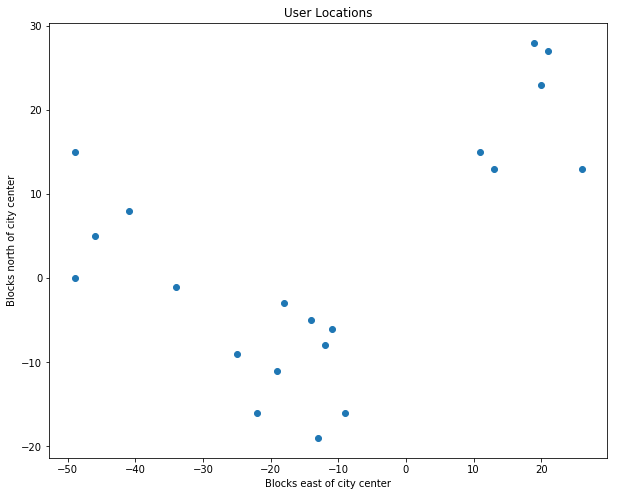

In [126]:
plot_user_locations(xs, ys)

In [127]:
random.seed(12) # to get the same results every time
clusterer = KMeans(k=3)
clusterer.train(inputs)

means = sorted(clusterer.means) # sort for the unit test
means

changed: 5 / 20: : 0it [00:00, ?it/s]

train -> inputs = [[-14, -5], [13, 13], [20, 23], [-19, -11], [-9, -16], [21, 27], [-49, 15], [26, 13], [-46, 5], [-34, -1], [11, 15], [-49, 0], [-22, -16], [19, 28], [-12, -8], [-13, -19], [-41, 8], [-11, -6], [-25, -9], [-18, -3]]
train -> initial random assignmnets: [1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2]

-----
train -> iteration = 0
cluster_means -> clusters = [[], [], []]
cluster_means -> clusters[1] = [[-14, -5]]
cluster_means -> clusters[1] = [[-14, -5], [13, 13]]
cluster_means -> clusters[2] = [[20, 23]]
cluster_means -> clusters[2] = [[20, 23], [-19, -11]]
cluster_means -> clusters[2] = [[20, 23], [-19, -11], [-9, -16]]
cluster_means -> clusters[1] = [[-14, -5], [13, 13], [21, 27]]
cluster_means -> clusters[0] = [[-49, 15]]
cluster_means -> clusters[1] = [[-14, -5], [13, 13], [21, 27], [26, 13]]
cluster_means -> clusters[0] = [[-49, 15], [-46, 5]]
cluster_means -> clusters[1] = [[-14, -5], [13, 13], [21, 27], [26, 13], [-34, -1]]
cluster_means -> clusters

[[-43.800000000000004, 5.4],
 [-15.888888888888888, -10.333333333333332],
 [18.333333333333332, 19.833333333333332]]

In [40]:
assert len(means) == 3

In [136]:
# Plot the data

import matplotlib.pyplot as plt
%matplotlib inline

def plot_user_locations_clusters(xs, ys, means):
    
    plt.figure(figsize=(10,8))

    plt.scatter(xs, ys)
    for i in range(len(means)):
        plt.annotate(i, (means[i][0], means[i][1]))
    #[plt.annotate(, (x, y)) for x, y in means]

    plt.title("User Locations")
    plt.xlabel("Blocks east of city center")
    plt.ylabel("Blocks north of city center")
    plt.savefig('images/clustering1.png')
    plt.show()

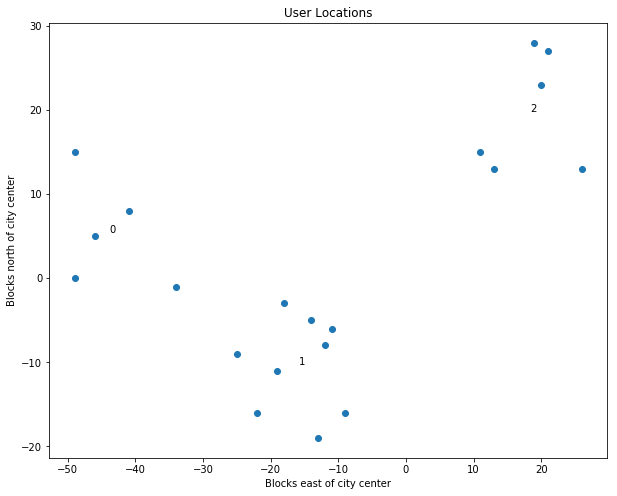

In [137]:
plot_user_locations_clusters(xs, ys, means)